In [1]:
import scipy.stats as st
n, m, s = 40, 160, 10
rg = st.norm(m, s)
data = rg.rvs(n)
print(data)

[ 171.56254268  164.94975932  162.33238882  168.1870472   162.77770656
  149.02572728  156.06034658  169.01911836  129.09771469  158.75389101
  149.83086966  172.78152099  170.0964193   159.14447253  156.23918513
  148.2981301   149.59615618  160.11866702  145.17913652  160.95149438
  165.47204819  148.57277869  165.04432447  172.49200774  138.65465647
  170.80661081  165.85725553  172.82525991  172.03825805  154.43787221
  150.8394918   152.25662939  170.77634403  163.63041355  164.94341575
  146.06960995  158.61618819  158.32954194  137.75586421  166.27436508]


In [2]:
import numpy as np
n, m, s = 40, 160, 10
data = np.random.randn(n) * s + m
print(data)

[ 165.82664413  153.49104549  144.07989897  155.62453242  153.49166078
  171.1329141   162.238273    174.59498402  162.53702554  162.56247024
  167.40032604  141.21152703  154.0386958   168.56995058  173.62015481
  146.68463838  151.50633791  175.00062727  147.46414513  178.52591669
  147.02792562  149.02401737  154.04611942  155.42829691  162.30260317
  148.21791865  152.64705071  140.27741556  172.02553723  149.46107159
  149.71808323  146.78269562  176.42049204  147.94729261  159.13232291
  151.14847188  170.62509685  158.72803642  165.27532033  161.97375753]


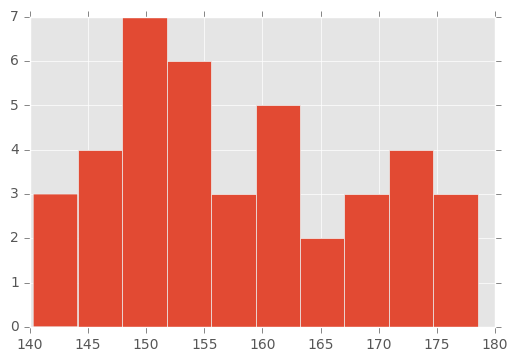

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
c, x, _ = plt.hist(data, 10)

In [5]:
print(c)
print(x)

[ 3.  4.  7.  6.  3.  5.  2.  3.  4.  3.]
[ 140.27741556  144.10226567  147.92711579  151.7519659   155.57681601
  159.40166613  163.22651624  167.05136635  170.87621647  174.70106658
  178.52591669]


In [23]:
rg1 = st.norm(165, 10)
rg2 = st.norm(160, 12)

data1 = rg1.rvs(40)
data2 = rg2.rvs(70)

(array([  4.,   0.,   7.,   9.,  12.,  12.,  16.,   8.,   1.,   1.]),
 array([ 134.39646263,  139.62090105,  144.84533948,  150.0697779 ,
         155.29421633,  160.51865475,  165.74309318,  170.9675316 ,
         176.19197003,  181.41640846,  186.64084688]),
 <a list of 10 Patch objects>)

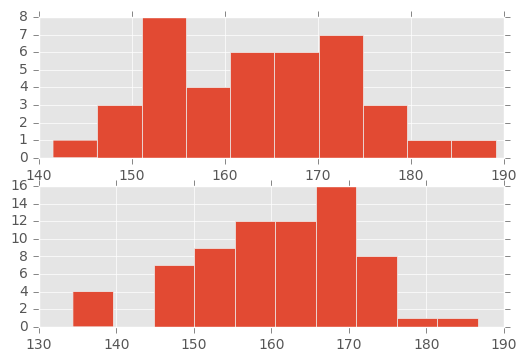

In [24]:
fig, axes = plt.subplots(nrows=2)
axes[0].hist(data1)
axes[1].hist(data2)

(array([ 0.        ,  0.00769231,  0.02692308,  0.03076923,  0.03461538,
         0.03461538,  0.05      ,  0.03846154,  0.02307692,  0.00384615]),
 array([ 140.,  144.,  148.,  152.,  156.,  160.,  164.,  168.,  172.,
         176.,  180.]),
 <a list of 10 Patch objects>)

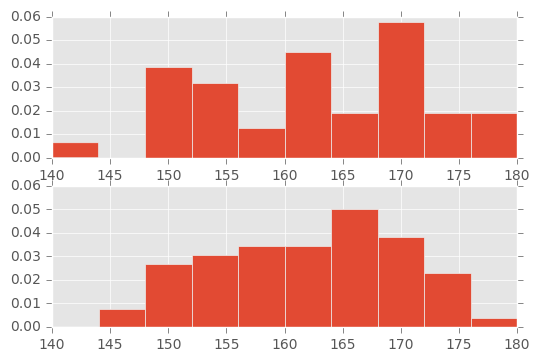

In [25]:
fig, axes = plt.subplots(nrows=2)
axes[0].hist(data1, range=(140, 180), normed=True)
axes[1].hist(data2, range=(140, 180), normed=True)

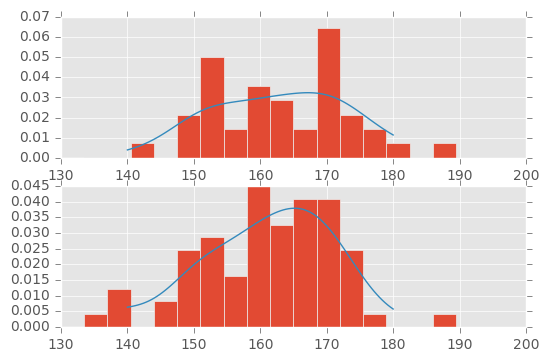

In [26]:
kde1 = st.gaussian_kde(data1)
kde2 = st.gaussian_kde(data2)
plot_x = np.linspace(140, 180, 100)
density1 = kde1(plot_x)
density2 = kde2(plot_x)

fig, axes = plt.subplots(nrows=2)
axes[0].hist(data1, 20, range=(130, 200), normed=True)
axes[0].plot(plot_x, density1)
axes[1].hist(data2, 20, range=(130, 200), normed=True)
axes[1].plot(plot_x, density2)

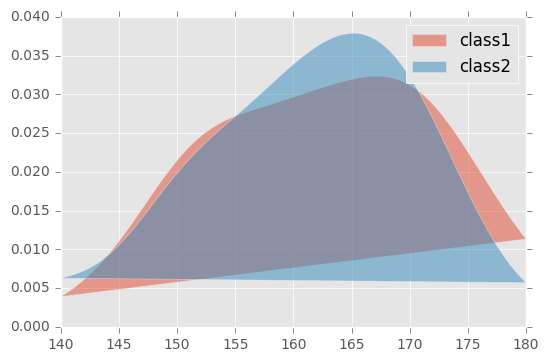

In [27]:
plt.fill(plot_x, density1, alpha=0.5, label="class1")
plt.fill(plot_x, density2, alpha=0.5, label="class2")
plt.legend()

In [28]:
temper1 = st.norm(25, 0.5).rvs(30)
temper2 = st.norm(25, 0.5).rvs(30)

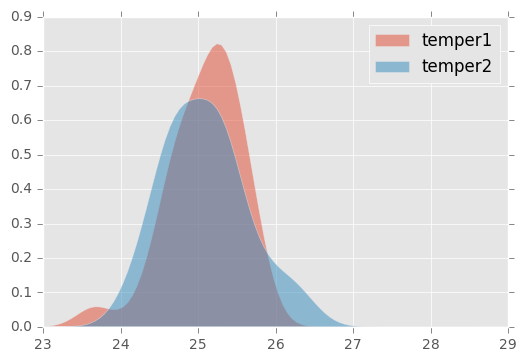

In [29]:
kde1 = st.gaussian_kde(temper1)
kde2 = st.gaussian_kde(temper2)
plot_x = np.linspace(23, 29, 100)

density1 = kde1(plot_x)
density2 = kde2(plot_x)

plt.fill(plot_x, density1, alpha=0.5, label="temper1")
plt.fill(plot_x, density2, alpha=0.5, label="temper2")
plt.legend()

In [30]:
result = st.ttest_ind(temper1, temper2, equal_var=False)
print(result.pvalue)

0.998420413411


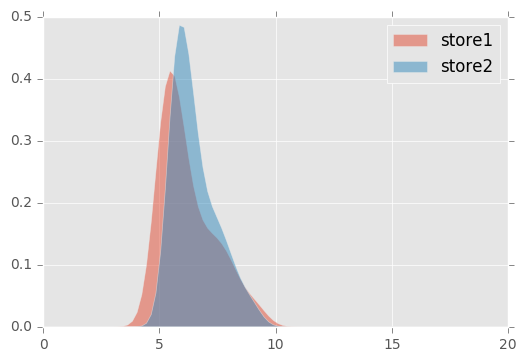

In [54]:
data1 = st.expon(5).rvs(50)
data2 = st.expon(5.5).rvs(50)

kde1 = st.gaussian_kde(data1)
kde2 = st.gaussian_kde(data2)
plot_x = np.linspace(0, 20, 100)

density1 = kde1(plot_x)
density2 = kde2(plot_x)

plt.fill(plot_x, density1, alpha=0.5, label="store1")
plt.fill(plot_x, density2, alpha=0.5, label="store2")
plt.legend()

In [55]:
result = st.ttest_ind(data1, data2, equal_var=False)
print(result.pvalue)

0.16013138347


In [56]:
result = st.mannwhitneyu(data1, data2)
print(result.pvalue)

0.0109471935439


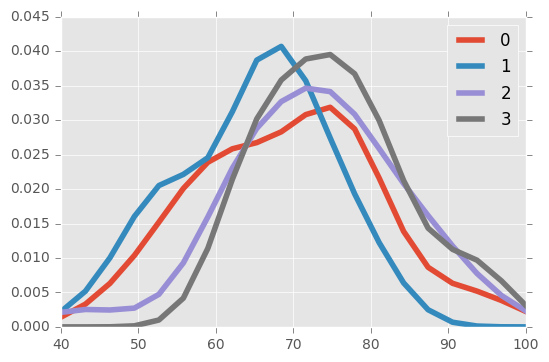

In [60]:
dat = np.loadtxt("chapter_4_anova_1.dat")
kdes = [st.gaussian_kde(dat[i, :]) for i in range(dat.shape[0])]
plot_x = np.linspace(40, 100, 20)
densities = [kde(plot_x) for kde in kdes]

for i in range(dat.shape[0]):
    plt.plot(plot_x, densities[i], linewidth=4, label=i)
plt.legend()

In [61]:
pvalue = st.f_oneway(*dat)
print(pvalue)

F_onewayResult(statistic=5.8459726668829282, pvalue=0.00093804469131263135)
